In [43]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch

torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)

In [44]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [45]:
from torchvision import datasets, transforms

data_path = '../data/ch7/'

cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [46]:
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [47]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']

cifar2 = [(img, label_map[label])
          for img, label in cifar10
          if label in [0, 2]]

cifar2_val = [(img, label_map[label]) 
              for img, label in cifar10_val
              if label in [0, 2]]

In [48]:
import torch.nn as nn

n_out = 2

model = nn.Sequential(
            nn.Linear(3072, 512, ), # input features, hidden layer size
            nn.Tanh(),
            nn.Linear(512, n_out, ) # hidden layer size, output classes
)

In [49]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

In [50]:
x = torch.tensor([1.0, 2.0, 3.0])
softmax(x)

tensor([0.0900, 0.2447, 0.6652])

In [51]:
softmax(x).sum()

tensor(1.)

In [52]:
softmax = nn.Softmax(dim=1)

x = torch.tensor([[1.0, 2.0, 3.0],
                  [1.0, 2.0, 3.0]])

softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [53]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.Softmax(dim=1)
)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8628641..2.029448].


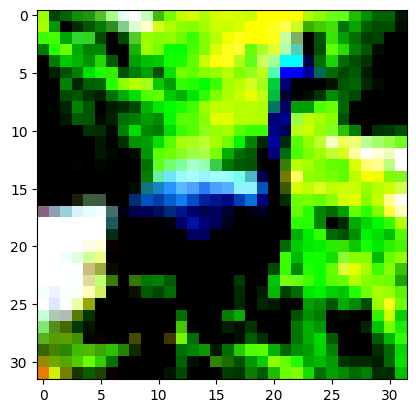

In [54]:
img, _ = cifar2[0]
plt.imshow(img.permute(1, 2, 0))
plt.show()

In [55]:
img_batch = img.view(-1).unsqueeze(0)

In [56]:
out = model(img_batch)
out

tensor([[0.4784, 0.5216]], grad_fn=<SoftmaxBackward0>)

In [57]:
_, index = torch.max(out, dim=1)

index

tensor([1])

In [58]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1)
)

In [59]:
loss = nn.NLLLoss()

In [60]:
img, label = cifar2[0]

out = model(img.view(-1).unsqueeze(0))

loss(out, torch.tensor([label]))

tensor(0.5077, grad_fn=<NllLossBackward0>)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for img, label in cifar2:
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_fn(out, torch.tensor([label]))
                
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss))) # Prints the loss for the last image. 
                                                        # In the next chapter, we will
                                                        # improve our output to give an average over
                                                        # the entire epoch.



Epoch: 0, Loss: 7.436963
Epoch: 1, Loss: 2.969128
Epoch: 2, Loss: 7.077729
Epoch: 3, Loss: 5.504475
Epoch: 4, Loss: 10.688177
Epoch: 5, Loss: 1.415906
Epoch: 6, Loss: 9.292529
Epoch: 7, Loss: 12.116428
Epoch: 8, Loss: 6.664639


KeyboardInterrupt: 

In [63]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

In [65]:
import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss))) # Due to the shuffling, this now prints the loss for a random batch - 
                                                        # clearly something we want to improve in chapter 8

Epoch: 0, Loss: 0.257707
Epoch: 1, Loss: 0.410050
Epoch: 2, Loss: 0.353380
Epoch: 3, Loss: 0.491312
Epoch: 4, Loss: 0.255176
Epoch: 5, Loss: 0.425032
Epoch: 6, Loss: 0.407701
Epoch: 7, Loss: 0.562127
Epoch: 8, Loss: 0.359097
Epoch: 9, Loss: 0.499740
Epoch: 10, Loss: 0.318886
Epoch: 11, Loss: 0.962872
Epoch: 12, Loss: 0.314391
Epoch: 13, Loss: 0.348557
Epoch: 14, Loss: 0.364174
Epoch: 15, Loss: 0.305631
Epoch: 16, Loss: 0.305762
Epoch: 17, Loss: 0.414332
Epoch: 18, Loss: 0.223709
Epoch: 19, Loss: 0.299378
Epoch: 20, Loss: 0.278254
Epoch: 21, Loss: 0.164422
Epoch: 22, Loss: 0.155688
Epoch: 23, Loss: 0.285705
Epoch: 24, Loss: 0.173727
Epoch: 25, Loss: 0.205155
Epoch: 26, Loss: 0.329013
Epoch: 27, Loss: 0.536953
Epoch: 28, Loss: 0.233588
Epoch: 29, Loss: 0.320415
Epoch: 30, Loss: 0.205343
Epoch: 31, Loss: 0.249236
Epoch: 32, Loss: 0.358398
Epoch: 33, Loss: 0.204784
Epoch: 34, Loss: 0.139924
Epoch: 35, Loss: 0.125468
Epoch: 36, Loss: 0.088745
Epoch: 37, Loss: 0.184781
Epoch: 38, Loss: 0.103

In [68]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.999400


In [67]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
print(f"Accuracy: {correct / total}")

Accuracy: 0.814


In [69]:
import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))


Epoch: 0, Loss: 0.582256
Epoch: 1, Loss: 0.561438
Epoch: 2, Loss: 0.277775
Epoch: 3, Loss: 0.524835
Epoch: 4, Loss: 0.285204
Epoch: 5, Loss: 0.666438
Epoch: 6, Loss: 0.212069
Epoch: 7, Loss: 0.394407
Epoch: 8, Loss: 0.703533
Epoch: 9, Loss: 0.508157
Epoch: 10, Loss: 0.580842
Epoch: 11, Loss: 0.299394
Epoch: 12, Loss: 0.733760
Epoch: 13, Loss: 0.327038
Epoch: 14, Loss: 0.725558
Epoch: 15, Loss: 0.443099
Epoch: 16, Loss: 0.531968
Epoch: 17, Loss: 0.607679
Epoch: 18, Loss: 0.323157
Epoch: 19, Loss: 0.240428
Epoch: 20, Loss: 0.648723
Epoch: 21, Loss: 0.164236
Epoch: 22, Loss: 0.381451
Epoch: 23, Loss: 0.494390
Epoch: 24, Loss: 0.066966
Epoch: 25, Loss: 0.312594
Epoch: 26, Loss: 0.416677
Epoch: 27, Loss: 0.274114
Epoch: 28, Loss: 0.115102
Epoch: 29, Loss: 0.093129
Epoch: 30, Loss: 0.349315
Epoch: 31, Loss: 0.103289
Epoch: 32, Loss: 0.208464
Epoch: 33, Loss: 0.071312
Epoch: 34, Loss: 0.198908
Epoch: 35, Loss: 0.176560
Epoch: 36, Loss: 0.259543
Epoch: 37, Loss: 0.224250
Epoch: 38, Loss: 0.078

In [70]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.999900


In [71]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.803000


In [75]:
numel_list = [p.numel()
              for p in model.parameters()
              if p.requires_grad == True]

sum(numel_list), numel_list

(3737474, [3145728, 1024, 524288, 512, 65536, 128, 256, 2])

In [77]:
first_model = nn.Sequential(
                nn.Linear(3072, 512),
                nn.Tanh(),
                nn.Linear(512, 2),
                nn.LogSoftmax(dim=1))

numel_list = [p.numel()
              for p in first_model.parameters()
              if p.requires_grad == True]

sum(numel_list), numel_list

(1574402, [1572864, 512, 1024, 2])

In [78]:
linear = nn.Linear(3072, 1024)

linear.weight.shape, linear.bias.shape

(torch.Size([1024, 3072]), torch.Size([1024]))

In [ ]:
"""" So, at the end of this chapter, we have a dataset, a model, and a training loop, and
our model learns. However, due to a mismatch between our problem and our network
structure, we end up overfitting our training data, rather than learning the general-
ized features of what we want the model to detect """

In [ ]:
"""" We’ve created a model that allows for relating every pixel to every other pixel in
the image, regardless of their spatial arrangement. We have a reasonable assumption
that pixels that are closer together are in theory a lot more related, though. This
means we are training a classifier that is not translation-invariant, so we’re forced to
use a lot of capacity for learning translated replicas if we want to hope to do well on
the validation set. There has to be a better way, right? """

In [ ]:
"""" Of course, most such questions in a book like this are rhetorical. The solution to
our current set of problems is to change our model to use convolutional layers. We\u2019ll
cover what that means in the next chapter. """